In [81]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [31]:
import requests


data = requests.get("https://api.covid19api.com/summary")

In [3]:
# type(data.json())
# data.json()
d=data.json()
# for key in d:
#     print(key,d["Countries"])


# print ()
# d=data.json().Countries
pd.DataFrame(d["Countries"])
# pd.head()

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,Afghanistan,AF,afghanistan,133,36675,1,1272,38,25509,2020-08-01T12:29:28Z,{}
1,Albania,AL,albania,79,5276,3,157,69,2952,2020-08-01T12:29:28Z,{}
2,Algeria,DZ,algeria,563,30394,10,1210,455,20537,2020-08-01T12:29:28Z,{}
3,Andorra,AD,andorra,3,925,0,52,1,807,2020-08-01T12:29:28Z,{}
4,Angola,AO,angola,39,1148,1,52,42,437,2020-08-01T12:29:28Z,{}
...,...,...,...,...,...,...,...,...,...,...,...
181,Viet Nam,VN,vietnam,49,558,3,3,0,373,2020-08-01T12:29:28Z,{}
182,Western Sahara,EH,western-sahara,0,10,0,1,0,8,2020-08-01T12:29:28Z,{}
183,Yemen,YE,yemen,2,1728,6,493,6,862,2020-08-01T12:29:28Z,{}
184,Zambia,ZM,zambia,408,5963,2,151,514,3803,2020-08-01T12:29:28Z,{}


In [32]:
data = pd.DataFrame(d["Countries"])
# data.to_csv('covid-d.csv')

In [50]:
covidHCWorkerData = pd.read_csv('.\Datasets\Pre_Processed_Data.csv', header = 0)
medicalStaffData = pd.read_csv('.\Datasets\Pre_processed_data_Infra.csv', header = 0)


In [60]:
for ind in data.index: 
    #  print(data['Country'][ind], data['NewConfirmed'][ind]) 
     country = data['Country'][ind]
    # print(ind)
    # Filtering  data on the bases of country. 
     fHCWData = covidHCWorkerData[covidHCWorkerData['Country'] == country]
    #  medStafData = medicalStaffData[medicalStaffData['Country'] == country]

     for i in fHCWData.index:
        #  if(country == "India"):
            #  print(fHCWData['Variable'][i], fHCWData['Value'][i].round())
             _column = fHCWData['Variable'][i]

             if _column in data.columns : 
                #  Inserting value if column exists.
                 data[_column][ind] = fHCWData['Value'][i].round()
             else :
                #  print("Creating column : ",_column)
                 data[_column] = np.nan
                 data[_column][ind] = fHCWData['Value'][i].round()
                #  print("Inserting value : ",fHCWData['Value'][i])

            
            

         




In [67]:
for ind in data.index: 
    #  print(data['Country'][ind], data['NewConfirmed'][ind]) 
     country = data['Country'][ind]
    # print(ind)
    # Filtering  data on the bases of country. 
     fHCWData = medicalStaffData[medicalStaffData['Country'] == country]
    #  medStafData = medicalStaffData[medicalStaffData['Country'] == country]

     for i in fHCWData.index:
        #  if(country == "India"):
            #  print(fHCWData['Variable'][i], fHCWData['Value'][i].round())
             _column = fHCWData['Variable'][i]

             if _column in data.columns : 
                #  Inserting value if column exists.
                 data[_column][ind] = fHCWData['Value'][i].round()
             else :
                #  print("Creating column : ",_column)
                 data[_column] = np.nan
                 data[_column][ind] = fHCWData['Value'][i].round()
                #  print("Inserting value : ",fHCWData['Value'][i])

            

In [68]:
# a = data.dropna(how='any',axis=0)
data[data['Practising caring personnel'].notnull()]
# Filters required

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,...,"Mammographs, in ambulatory sector","Mammographs, in hospitals",Other hospital beds,"Positron Emission Tomography (PET) scanners, in ambulatory sector","Positron Emission Tomography (PET) scanners, in hospitals",Practising caring personnel,"Radiation therapy equipment, in ambulatory sector","Radiation therapy equipment, in hospitals",Rehabilitative care beds,Professionally active caring personnel
9,Austria,AT,austria,175,21130,0,718,130,18758,2020-08-01T12:29:28Z,...,97.0,13.0,0.0,1.0,9.0,4998.0,0.0,23.0,4525.0,NaN
30,Canada,CA,canada,604,118268,6,8979,562,102906,2020-08-01T12:29:28Z,...,151.0,171.0,206.0,3.0,15.0,90993.0,0.0,54.0,1994.0,NaN
44,Czech Republic,CZ,czech-republic,203,16574,3,382,87,11569,2020-08-01T12:29:28Z,...,29.0,41.0,940.0,0.0,6.0,12573.0,5.0,42.0,2026.0,NaN
46,Denmark,DK,denmark,64,14028,0,615,53,12780,2020-08-01T12:29:28Z,...,7.0,43.0,0.0,0.0,19.0,44400.0,0.0,38.0,99.0,47023.0
55,Estonia,EE,estonia,13,2064,0,69,4,1930,2020-08-01T12:29:28Z,...,3.0,10.0,84.0,0.0,2.0,1635.0,0.0,4.0,164.0,NaN
58,Finland,FI,finland,9,7432,0,329,0,6950,2020-08-01T12:29:28Z,...,0.0,102.0,59.0,0.0,6.0,52939.0,0.0,30.0,256.0,66819.0
63,Germany,DE,germany,864,210399,3,9147,441,191992,2020-08-01T12:29:28Z,...,NaN,NaN,0.0,NaN,53.0,152260.0,NaN,204.0,84573.0,NaN
65,Greece,GR,greece,76,4477,3,206,0,1374,2020-08-01T12:29:28Z,...,264.0,81.0,3396.0,1.0,4.0,3831.0,3.0,35.0,174.0,NaN
74,Hungary,HU,hungary,21,4505,0,596,7,3353,2020-08-01T12:29:28Z,...,NaN,NaN,0.0,NaN,NaN,13084.0,NaN,NaN,7460.0,NaN
75,Iceland,IS,iceland,13,1885,0,10,2,1825,2020-08-01T12:29:28Z,...,11.0,0.0,0.0,0.0,0.0,2232.0,0.0,7.0,33.0,NaN


In [80]:
fileN = "Datasets\ETLCovidData" + str(datetime.datetime.now().strftime('%A'))
data.to_csv(fileN, encoding='utf-8', index=False)

In [116]:
data.head()
d= pd.DataFrame(data.head(),columns=['TotalDeaths','Practising physicians',"Country"])
data.head()

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,...,"Mammographs, in ambulatory sector","Mammographs, in hospitals",Other hospital beds,"Positron Emission Tomography (PET) scanners, in ambulatory sector","Positron Emission Tomography (PET) scanners, in hospitals",Practising caring personnel,"Radiation therapy equipment, in ambulatory sector","Radiation therapy equipment, in hospitals",Rehabilitative care beds,Professionally active caring personnel
0,Afghanistan,AF,afghanistan,133,36675,1,1272,38,25509,2020-08-01T12:29:28Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,AL,albania,79,5276,3,157,69,2952,2020-08-01T12:29:28Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,DZ,algeria,563,30394,10,1210,455,20537,2020-08-01T12:29:28Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Andorra,AD,andorra,3,925,0,52,1,807,2020-08-01T12:29:28Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AO,angola,39,1148,1,52,42,437,2020-08-01T12:29:28Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
d.head()


,TotalDeaths,Practising physicians
0,1272,NaN
1,157,NaN
2,1210,NaN
3,52,NaN
4,52,NaN


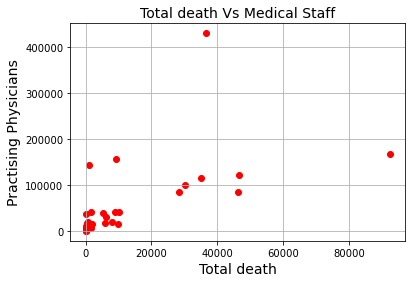

In [120]:
d = pd.DataFrame(data,columns=['TotalDeaths','Practising physicians'])
plt.scatter(d['TotalDeaths'], d['Practising physicians'], color='red')
plt.title('Total death Vs Medical Staff', fontsize=14)
plt.xlabel('Total death', fontsize=14)
plt.ylabel('Practising Physicians', fontsize=14)
plt.grid(True)
plt.show()